In [1]:
import numpy as np
import json
import os

In [2]:
dir = 'output_ce_10/imagenet/sup_vitb16_imagenet21k/lr0.5_wd0.001/run1'
loss_name = "CE"
fname = 'val_imagenet_invariances.json'
print("Current dir", os.getcwd())
with open(os.path.join(dir, fname)) as f:
    data = json.load(f)
print(data)

Current dir /raid/s2265822/vpt
{'features_sim': {'h_flip': 0.9708203673362732, 'rotation': 0.5686530470848083, 'translation': 0.8444915413856506, 'scale': 0.8830350041389465, 'vflip': 0.5963901877403259, 'grayscale': 0.6928196549415588, 'brightness': 0.4206518232822418, 'contrast': 0.4286152124404907, 'saturation': 0.3969275951385498, 'blur': 0.8924979567527771}, 'token_sim': {'h_flip': 0.9666757583618164, 'rotation': 0.5673375725746155, 'translation': 0.8467044234275818, 'scale': 0.8873013854026794, 'vflip': 0.5868003964424133, 'grayscale': 0.6562566757202148, 'brightness': 0.399314820766449, 'contrast': 0.4109760820865631, 'saturation': 0.3700733482837677, 'blur': 0.8758664131164551}}


In [3]:
features_sim = data['features_sim']
token_sim = data['token_sim']

In [4]:
import matplotlib.pyplot as plt
augs = list(features_sim.keys())

features_cos = []
tokens_cos = []
for a in augs:
    features_cos.append(features_sim[a])

for a in augs:
    tokens_cos.append(token_sim[a])
print(features_cos)
print(tokens_cos)
# augs = augs[30:31]

[0.9708203673362732, 0.5686530470848083, 0.8444915413856506, 0.8830350041389465, 0.5963901877403259, 0.6928196549415588, 0.4206518232822418, 0.4286152124404907, 0.3969275951385498, 0.8924979567527771]
[0.9666757583618164, 0.5673375725746155, 0.8467044234275818, 0.8873013854026794, 0.5868003964424133, 0.6562566757202148, 0.399314820766449, 0.4109760820865631, 0.3700733482837677, 0.8758664131164551]


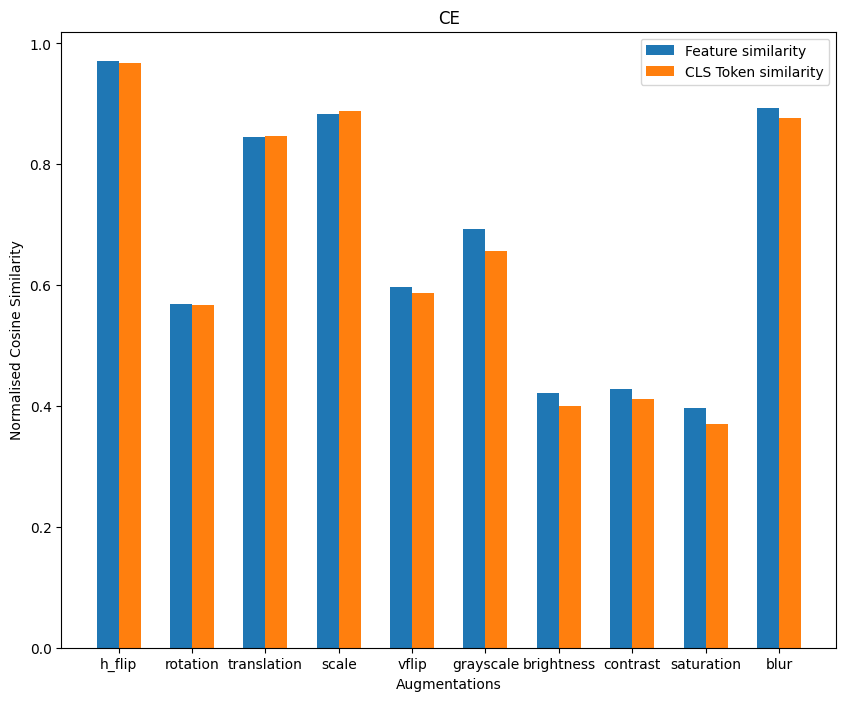

In [8]:
# Position of bars on x-axis
bar_width = 0.3  # Width of the bars
x = np.arange(len(augs))
fig, ax = plt.subplots(figsize=(10,8))

rects1 = ax.bar(x - bar_width/2, features_cos, bar_width, label='Feature similarity')
rects2 = ax.bar(x + bar_width/2, tokens_cos, bar_width, label='CLS Token similarity')

ax.set_xlabel('Augmentations')
ax.set_ylabel('Normalised Cosine Similarity')
ax.set_title(loss_name)
ax.set_xticks(x)
ax.set_xticklabels(augs)
ax.legend()


# Display the plot
plt.savefig(os.path.join(dir, fname.split(".")[0] + "_" + loss_name + ".png"))